In [59]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [60]:
data = pd.read_csv('hour (1).csv')
data.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
data.shape

(17379, 17)

In [62]:
c_data = data.copy()

In [63]:
c_data.drop(['index','date','casual','registered'],axis=1,inplace=True)

In [64]:
c_data.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

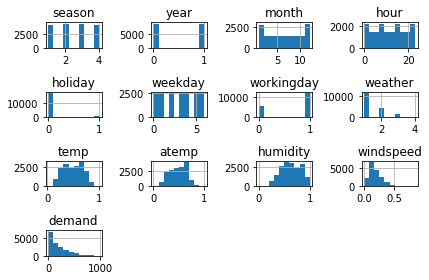

In [65]:
c_data.hist()
plt.tight_layout()     # demand is not normally distributed

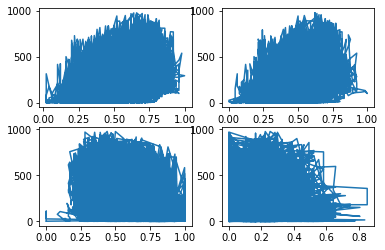

In [66]:
plt.subplot(2,2,1)
plt.plot(c_data['temp'],c_data['demand'],markersize=0.1)

plt.subplot(2,2,2)
plt.plot(c_data['atemp'],c_data['demand'],markersize=0.1)

plt.subplot(2,2,3)                                             # temp and atemp have allmost same relation with dimand, so both 
                                                                 #are multicollinearity
plt.plot(c_data['humidity'],c_data['demand'],markersize=0.1)   #THERE IS NO RELATION OF DEMAND AND windspeed, SO WE DROP HUMIDITY

plt.subplot(2,2,4)
plt.plot(c_data['windspeed'],c_data['demand'],markersize=0.1)


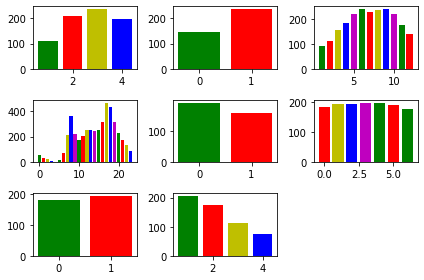

In [67]:
l = ['season','year','month','hour','holiday','weekday','workingday','weather']
for i in range(1,9):
    plt.subplot(3,3,i)
    cat_list = c_data[l[i-1]].unique()                # NO RELATION OF WEEKDAYS,WORKINGDAYS WITH DEMAND
    cat_avg = c_data.groupby(l[i-1]).mean()['demand']
    colour = ['g','r','y','b','m']
    plt.bar(cat_list,cat_avg,color = colour)
    plt.tight_layout()

In [68]:
#CHECK OUTLIER

c_data['demand'].describe()      #here we can see 50% of data far from his max value and min value

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [69]:
#CHECK CORRILATION

c_data[['year','weekday','workingday','humidity','windspeed','demand']].corr()    #not good relation with target

,year,weekday,workingday,humidity,windspeed,demand
year,1.000000,-0.004485,-0.002196,-0.083546,-0.008740,0.250495
weekday,-0.004485,1.000000,0.035955,-0.037158,0.011502,0.026900
workingday,-0.002196,0.035955,1.000000,0.015688,-0.011830,0.030284
humidity,-0.083546,-0.037158,0.015688,1.000000,-0.290105,-0.322911
windspeed,-0.008740,0.011502,-0.011830,-0.290105,1.000000,0.093234
demand,0.250495,0.026900,0.030284,-0.322911,0.093234,1.000000


In [70]:
clean_data = c_data.drop(['year','weekday','windspeed','workingday','atemp'],axis =1)

In [71]:
clean_data.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [72]:
df1 = pd.to_numeric(clean_data['demand'],downcast='float')

In [73]:
df1.head()

0    16.0
1    40.0
2    32.0
3    13.0
4     1.0
Name: demand, dtype: float32

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1e994d00fc8>)

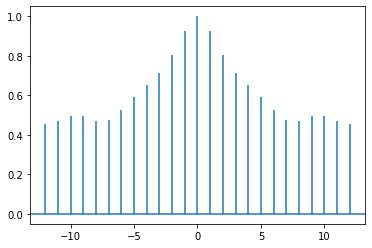

In [74]:
plt.acorr(df1,maxlags=12)      #High Autocorrelation

array([[<AxesSubplot:title={'center':'demand'}>]], dtype=object)

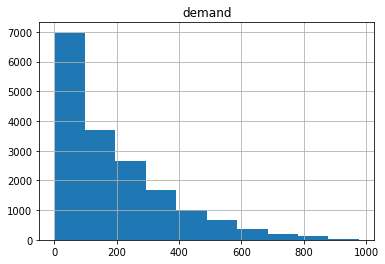

In [75]:
# CONVERT DEMAND DATA INTO NORMAL FORM
clean_data.hist('demand')

In [76]:
clean_data['demand'] = np.log(clean_data['demand'])


array([[<AxesSubplot:title={'center':'demand'}>]], dtype=object)

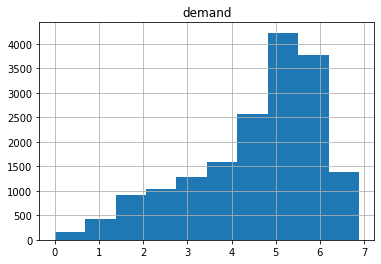

In [77]:
clean_data.hist('demand')

In [78]:
clean_data.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000


In [79]:
for i in ['season','month','hour','holiday','weather']:
    print(f"{i}----unique values------{clean_data[i].unique()}")

season----unique values------[1 2 3 4]
month----unique values------[ 1  2  3  4  5  6  7  8  9 10 11 12]
hour----unique values------[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday----unique values------[0 1]
weather----unique values------[1 2 3 4]


In [80]:
clean_data.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
dtype: object

In [81]:
clean_data['season'] = clean_data['season'].astype('category')
clean_data['month'] = clean_data['month'].astype('category')
clean_data['hour'] = clean_data['hour'].astype('category')
clean_data['holiday'] = clean_data['holiday'].astype('category')
clean_data['weather'] = clean_data['weather'].astype('category')

In [82]:
clean_data.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
dtype: object

In [83]:
df = pd.get_dummies(clean_data,drop_first=True)
df.head()

,temp,humidity,demand,season_2,season_3,season_4,month_2,month_3,month_4,month_5,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
0,0.24,0.81,2.772589,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.22,0.80,3.688879,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.22,0.80,3.465736,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.24,0.75,2.564949,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
x = df.drop('demand',axis=1).values
y = df['demand']
x

array([[0.24, 0.81, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.22, 0.8 , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.22, 0.8 , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.26, 0.6 , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.26, 0.56, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.26, 0.65, 0.  , ..., 0.  , 0.  , 0.  ]])

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [119]:
model = LinearRegression()

In [120]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
model.score(x_test,y_test)


0.7933595131571459

In [122]:
y_pred = model.predict(x_test)

In [123]:
from sklearn.metrics import mean_squared_error
import math

In [129]:
rsme = math.sqrt(mean_squared_error(y_test,y_pred))

In [130]:
rmse

0.6815503786912341